# Roche robotics poject

## Imports

In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
from omegaconf import OmegaConf
import torch
import torch.nn.functional as F

from habitat_baselines.config.default import get_config
from habitat_baselines.rl.ppo.ppo_trainer import PPOTrainer

from pg.base_pg import BasePolicyGradient
from pg.base_pg_trainer import BasePolicyGradientTrainer

## Useful functions

In [3]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd


def parse_tensorboard(path, scalars, prefix=""):
    """returns a dictionary of pandas dataframes for each requested scalar"""
    ea = event_accumulator.EventAccumulator(
        path,
        size_guidance={event_accumulator.SCALARS: 0},
    )
    _ = ea.Reload()
    df = pd.DataFrame(ea.Scalars(scalars[0]))
    df[f'{scalars[0]}'] = df['value']
    df.drop(columns=['value'], inplace=True)
    for k in scalars:
        df[k] = pd.DataFrame(ea.Scalars(k))['value']
    return df

## Configuration 1 : PointNav, Empty Room, All sensors

### PPO Configuration

In [15]:
# A function to build configuration for PPO training
def build_PPO_config():
    config = get_config("pointnav/ppo_pointnav.yaml")
    # Change for REINFORCE
    OmegaConf.set_readonly(config, False)
    config.habitat_baselines.checkpoint_folder = "data/PPO_checkpoints"
    config.habitat_baselines.tensorboard_dir = "tb/PPO"
    config.habitat_baselines.num_updates = -1
    config.habitat_baselines.num_environments = 2
    config.habitat_baselines.verbose = False
    config.habitat_baselines.num_checkpoints = -1
    config.habitat_baselines.checkpoint_interval = 1000000
    config.habitat_baselines.total_num_steps = 150 * 1000
    # config.habitat_baselines.force_blind_policy = True
    config.habitat.dataset.data_path="data/datasets/pointnav/simple_room/v0/{split}/empty_room.json.gz"
    OmegaConf.set_readonly(config, True)

    return config

config = build_PPO_config()  # Build the config for PPO
# Set randomness
random.seed(config.habitat.seed)
np.random.seed(config.habitat.seed)
torch.manual_seed(config.habitat.seed)
if (
    config.habitat_baselines.force_torch_single_threaded
    and torch.cuda.is_available()
):
    torch.set_num_threads(1)

import os
os.environ["MAGNUM_LOG"] = "quiet"
os.environ["HABITAT_SIM_LOG"] = "quiet"


### Training phase

In [16]:
# Build the trainer and start training
trainer = PPOTrainer(config)
trainer.train()

2025-04-29 12:43:03,303 Loading resume state: data/PPO_checkpoints/.habitat-resume-state.pth
2025-04-29 12:43:03,327 
##################
You are attempting to resume training with a different configuration than the one used for the original training run. Since load_resume_state_config=True, the ORIGINAL configuration will be used and the new configuration will be IGNORED.##################

2025-04-29 12:43:03,328 Initializing dataset PointNav-v1
2025-04-29 12:43:03,852 There are less scenes (1) than environments (2). Each environment will use all the scenes instead of using a subset.
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
2025-04-29 12:43:15,196 Initializing dataset PointNav-v1
2025-04-29 12:43:15,249 Initializing dataset PointNav-v1
2025-04-29 12:43:15,611 init

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint'

In [17]:
ppo_config_1_logs = parse_tensorboard("tb/PPO", ["metrics/spl", "reward", "learner/grad_norm"])

### Agent sensors

In [18]:
from habitat_baselines.common.construct_vector_env import construct_envs
from habitat_baselines.config.default import get_config

config = build_PPO_config()
OmegaConf.set_readonly(config, False)

# Creating the environment
envs = construct_envs(config)

# Retrieve the observations
obs = envs.reset()  

# Verify the keys of the observation
print("Available observations :", obs[0].keys())  # Obs of environment 0
OmegaConf.set_readonly(config, True)


2025-04-29 12:44:38,331 Initializing dataset PointNav-v1
2025-04-29 12:44:39,035 There are less scenes (1) than environments (2). Each environment will use all the scenes instead of using a subset.
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
2025-04-29 12:44:50,366 Initializing dataset PointNav-v1
2025-04-29 12:44:50,368 Initializing dataset PointNav-v1
2025-04-29 12:44:50,782 initializing sim Sim-v0
2025-04-29 12:44:50,783 initializing sim Sim-v0


Available observations : odict_keys(['depth', 'pointgoal_with_gps_compass', 'rgb'])


2025-04-29 12:44:55,376 Initializing task Nav-v0
2025-04-29 12:44:55,383 Initializing task Nav-v0


## Configuration 2 : PointNav, Multiple Rooms, All sensors

### PPO Configuration

In [26]:
# A function to build configuration for PPO training
def build_PPO_config():
    config = get_config("pointnav/ppo_pointnav.yaml")
    # Change for REINFORCE
    OmegaConf.set_readonly(config, False)
    config.habitat_baselines.checkpoint_folder = "data/PPO_checkpoints"
    config.habitat_baselines.tensorboard_dir = "tb/PPO"
    config.habitat_baselines.num_updates = -1
    config.habitat_baselines.num_environments = 2
    config.habitat_baselines.verbose = False
    config.habitat_baselines.num_checkpoints = -1
    config.habitat_baselines.checkpoint_interval = 1000000
    config.habitat_baselines.total_num_steps = 150 * 1000
    # config.habitat_baselines.force_blind_policy = True
    config.habitat.dataset.data_path="data/datasets/pointnav/multiple_room/v0/{split}/Adrian.json.gz"
    OmegaConf.set_readonly(config, True)

    return config

config = build_PPO_config()  # Build the config for PPO
# Set randomness
random.seed(config.habitat.seed)
np.random.seed(config.habitat.seed)
torch.manual_seed(config.habitat.seed)
if (
    config.habitat_baselines.force_torch_single_threaded
    and torch.cuda.is_available()
):
    torch.set_num_threads(1)

import os
os.environ["MAGNUM_LOG"] = "quiet"
os.environ["HABITAT_SIM_LOG"] = "quiet"


### Training phase

In [27]:
# Build the trainer and start training
trainer = PPOTrainer(config)
trainer.train()

2025-04-29 13:03:14,229 Loading resume state: data/PPO_checkpoints/.habitat-resume-state.pth
2025-04-29 13:03:14,290 
##################
You are attempting to resume training with a different configuration than the one used for the original training run. Since load_resume_state_config=True, the ORIGINAL configuration will be used and the new configuration will be IGNORED.##################

2025-04-29 13:03:14,291 Initializing dataset PointNav-v1
2025-04-29 13:03:14,830 There are less scenes (1) than environments (2). Each environment will use all the scenes instead of using a subset.
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
Neither `ifconfig` (`ifconfig -a`) nor `ip` (`ip address show`) commands are available, listing network interfaces is likely to fail
2025-04-29 13:03:26,189 Initializing dataset PointNav-v1
2025-04-29 13:03:26,289 Initializing dataset PointNav-v1
2025-04-29 13:03:26,597 init

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint'

In [28]:
ppo_config_2_logs = parse_tensorboard("tb/PPO", ["metrics/spl", "reward", "learner/grad_norm"])

## Perfomances

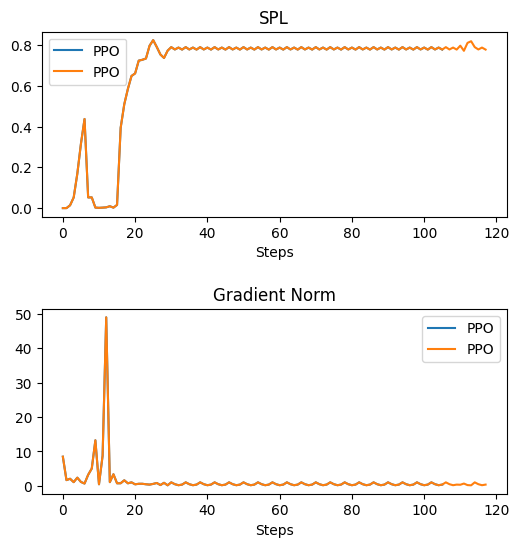

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
plt.subplots_adjust(hspace=0.5)
plt.axes(axes[0])

plt.plot(ppo_config_1_logs['metrics/spl'], label="PPO")
plt.plot(ppo_config_2_logs['metrics/spl'], label="PPO")

plt.title("SPL")
plt.xlabel("Steps")
plt.legend()

plt.axes(axes[1])

plt.plot(ppo_config_1_logs['learner/grad_norm'], label="PPO")
plt.plot(ppo_config_2_logs['learner/grad_norm'], label="PPO")

plt.title("Gradient Norm")
plt.xlabel("Steps")
plt.legend()